In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## International Report Passengers

### Column Name	Example Value	Description
   *  Year
   *  Month
   *  usg_apt_id = (US Gateway Airport ID - assigned by US DOT to identify an airport)
   *  usg_apt =	US Gateway Airport Code
   *  usg_wac	=	US Gateway World Area Code 
   *  fg_apt_id	=	Foreign Gateway Airport ID 
   *  fg_apt =	ICN	Foreign Gateway Airport Code 
   *  fg_wac =	Foreign Gateway World Area Code 
   *  airlineid	=	Airline ID 
   *  carrier = assigned air carrier code
   *  carriergroup	=	Carrier Group Code (1: US domestic air carriers, 0: foreign air carriers)
   *  type =	Defines the type of flight operated
   *  Scheduled =	Number of passengers carried by scheduled service operations 
   *  Charter =	Number of passengers carried by charter operations
   *  Total	= Total passengers carried by scheduled service and charter operations
   
   
   
   
   
   Source: https://data.transportation.gov/Aviation/International_Report_Passengers/xgub-n9bw
   
   Airlines:
https://www.transportation.gov/sites/dot.dev/files/docs/International_Carrier_Codes.txt

   Destinations:
https://www.transportation.gov/sites/dot.dev/files/docs/airports_codes.txt

In [2]:
passengers = pd.read_csv('C:\\Users\\carlo\\Desktop\\International_Report_Passengers.csv')
passengers.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,carrier,carriergroup,type,Scheduled,Charter,Total
0,06/01/2007,2007,6,13204,MCO,33,16085,YHZ,951,20364,C6,0,Passengers,0,683,683
1,12/01/2005,2005,12,11433,DTW,43,10411,AUA,277,20344,RD,1,Passengers,0,1010,1010
2,04/01/2003,2003,4,13487,MSP,63,16304,ZIH,148,20204,MG,1,Passengers,0,508,508
3,12/01/2005,2005,12,12016,GUM,5,11138,CRK,766,20312,TZ,1,Passengers,0,76,76
4,03/01/2007,2007,3,14843,SJU,3,15084,SXM,259,20421,SLQ,1,Passengers,0,35,35


In [3]:
airport = pd.read_excel('C:\\Users\\carlo\\Desktop\\Datos.xlsx',sheet_name='airports_codes')
airport.head()

,AirportCode,CityName,WorldAreaCode
0,AAC,"AL ARISH, ARAB REP. OF EGYPT",591
1,AAE,"ANNABA, ALGERIA",500
2,AAF,"APALACHICOLA, FLORIDA, USA",33
3,AAH,"AACHEN, GERMANY",429
4,AAI,"ARRAIAS, BRAZIL",316


In [4]:
carriers = pd.read_excel('C:\\Users\\carlo\\Desktop\\Datos.xlsx')
carriers.head()

,Code CarrierName.1,Code CarrierName.2
0,1I,Sky Trek Int'L Airlines
1,2T,"Canada 3000 Airlines, Ltd."
2,2Z,Air Comet S.A.
3,3K,Tatonduk Flying Service
4,5G,Queen Air


## Combinar las tablas para tener una sola

In [5]:
passengers = passengers.merge(airport,how='inner',left_on='usg_apt',right_on='AirportCode')
passengers = passengers.merge(carriers,how='inner',left_on='carrier',right_on='Code    CarrierName.1')
passengers = passengers.merge(airport,how='inner',left_on='fg_apt',right_on='AirportCode')
passengers.head()

,data_dte,Year,Month,usg_apt_id,usg_apt,usg_wac,fg_apt_id,fg_apt,fg_wac,airlineid,...,Charter,Total,AirportCode_x,CityName_x,WorldAreaCode_x,Code CarrierName.1,Code CarrierName.2,AirportCode_y,CityName_y,WorldAreaCode_y
0,02/01/2002,2002,2,13204,MCO,33,16271,YYZ,936,20065,...,693,693,MCO,"ORLANDO, FLORIDA, USA",33,SEQ,Sky Service F.B.O.,YYZ,"TORONTO, ONTARIO, CANADA",936
1,07/01/2005,2005,7,13204,MCO,33,16271,YYZ,936,20065,...,5275,5275,MCO,"ORLANDO, FLORIDA, USA",33,SEQ,Sky Service F.B.O.,YYZ,"TORONTO, ONTARIO, CANADA",936
2,11/01/2003,2003,11,13204,MCO,33,16271,YYZ,936,20065,...,3653,3653,MCO,"ORLANDO, FLORIDA, USA",33,SEQ,Sky Service F.B.O.,YYZ,"TORONTO, ONTARIO, CANADA",936
3,12/01/2005,2005,12,13204,MCO,33,16271,YYZ,936,20065,...,2638,2638,MCO,"ORLANDO, FLORIDA, USA",33,SEQ,Sky Service F.B.O.,YYZ,"TORONTO, ONTARIO, CANADA",936
4,05/01/2004,2004,5,13204,MCO,33,16271,YYZ,936,20065,...,4164,4164,MCO,"ORLANDO, FLORIDA, USA",33,SEQ,Sky Service F.B.O.,YYZ,"TORONTO, ONTARIO, CANADA",936


In [6]:
passengers.columns

Index(['data_dte', 'Year', 'Month', 'usg_apt_id', 'usg_apt', 'usg_wac',
       'fg_apt_id', 'fg_apt', 'fg_wac', 'airlineid', 'carrier', 'carriergroup',
       'type', 'Scheduled', 'Charter', 'Total', 'AirportCode_x', 'CityName_x',
       'WorldAreaCode_x', 'Code    CarrierName.1', 'Code    CarrierName.2',
       'AirportCode_y', 'CityName_y', 'WorldAreaCode_y'],
      dtype='object')

### Quitar columnas Duplicadas o que no añadan ninguna información reelevante

In [7]:
data = passengers.drop(['Year','Month','type','carrier','usg_apt_id','usg_wac','fg_apt_id','fg_apt','fg_wac','airlineid','Charter', 'Total', 'AirportCode_x','WorldAreaCode_x', 'Code    CarrierName.1','AirportCode_y','WorldAreaCode_y'],axis=1)
data['data_dte'] = pd.to_datetime(data['data_dte'])
data.head()

,data_dte,usg_apt,carriergroup,Scheduled,CityName_x,Code CarrierName.2,CityName_y
0,2002-02-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA"
1,2005-07-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA"
2,2003-11-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA"
3,2005-12-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA"
4,2004-05-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA"


### Revisar si faltan datos

In [8]:
data.isnull().sum()[passengers.isnull().sum() > 0] / len(passengers) * 100

Series([], dtype: float64)

In [9]:
data.isnull().sum()

data_dte                 0
usg_apt                  0
carriergroup             0
Scheduled                0
CityName_x               0
Code    CarrierName.2    0
CityName_y               0
dtype: int64

In [10]:
data.shape

(580927, 7)

### Agregar columnas de tiempo

In [11]:
data['Year'] = data['data_dte'].dt.year
data['month_name'] = data['data_dte'].dt.month_name()
data['day_name'] = data['data_dte'].dt.day_name()
data['day_week'] = data['data_dte'].dt.weekday
data['Month'] = data['data_dte'].dt.month

In [12]:
data.head()

,data_dte,usg_apt,carriergroup,Scheduled,CityName_x,Code CarrierName.2,CityName_y,Year,month_name,day_name,day_week,Month
0,2002-02-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA",2002,February,Friday,4,2
1,2005-07-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA",2005,July,Friday,4,7
2,2003-11-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA",2003,November,Saturday,5,11
3,2005-12-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA",2005,December,Thursday,3,12
4,2004-05-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA",2004,May,Saturday,5,5


### Cambiar nombres de columnas por unos que sean más explicitos

In [13]:
names = {'data_dte':'Date', 'CityName_x':'From','Code    CarrierName.2':'Airline','CityName_y':'Destination','usg_apt':'Airport'}
data.rename(mapper=names,axis=1,inplace=True)
data.head()

,Date,Airport,carriergroup,Scheduled,From,Airline,Destination,Year,month_name,day_name,day_week,Month
0,2002-02-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA",2002,February,Friday,4,2
1,2005-07-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA",2005,July,Friday,4,7
2,2003-11-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA",2003,November,Saturday,5,11
3,2005-12-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA",2005,December,Thursday,3,12
4,2004-05-01,MCO,0,0,"ORLANDO, FLORIDA, USA",Sky Service F.B.O.,"TORONTO, ONTARIO, CANADA",2004,May,Saturday,5,5


### Dividir la columna de 'Destination', podremos ganar más información

In [14]:
data['Country Departure'] = data['From'].apply(lambda x:x.split(',')[-1].strip())
data['State Departure'] = data['From'].apply(lambda x:x.split(',')[-2].strip())
data['City Departure'] = data['From'].apply(lambda x:x.split(',')[0])
data['Country Destination'] = data['Destination'].apply(lambda x:x.split(',')[-1].strip())
data['City Destination'] = data['Destination'].apply(lambda x:x.split(',')[0])
data['Airline'] = data['Airline'].apply(lambda x:x.strip())
data.drop(['From','Destination'],axis=1,inplace=True)
data.head()

,Date,Airport,carriergroup,Scheduled,Airline,Year,month_name,day_name,day_week,Month,Country Departure,State Departure,City Departure,Country Destination,City Destination
0,2002-02-01,MCO,0,0,Sky Service F.B.O.,2002,February,Friday,4,2,USA,FLORIDA,ORLANDO,CANADA,TORONTO
1,2005-07-01,MCO,0,0,Sky Service F.B.O.,2005,July,Friday,4,7,USA,FLORIDA,ORLANDO,CANADA,TORONTO
2,2003-11-01,MCO,0,0,Sky Service F.B.O.,2003,November,Saturday,5,11,USA,FLORIDA,ORLANDO,CANADA,TORONTO
3,2005-12-01,MCO,0,0,Sky Service F.B.O.,2005,December,Thursday,3,12,USA,FLORIDA,ORLANDO,CANADA,TORONTO
4,2004-05-01,MCO,0,0,Sky Service F.B.O.,2004,May,Saturday,5,5,USA,FLORIDA,ORLANDO,CANADA,TORONTO


## Exploratory Analysis

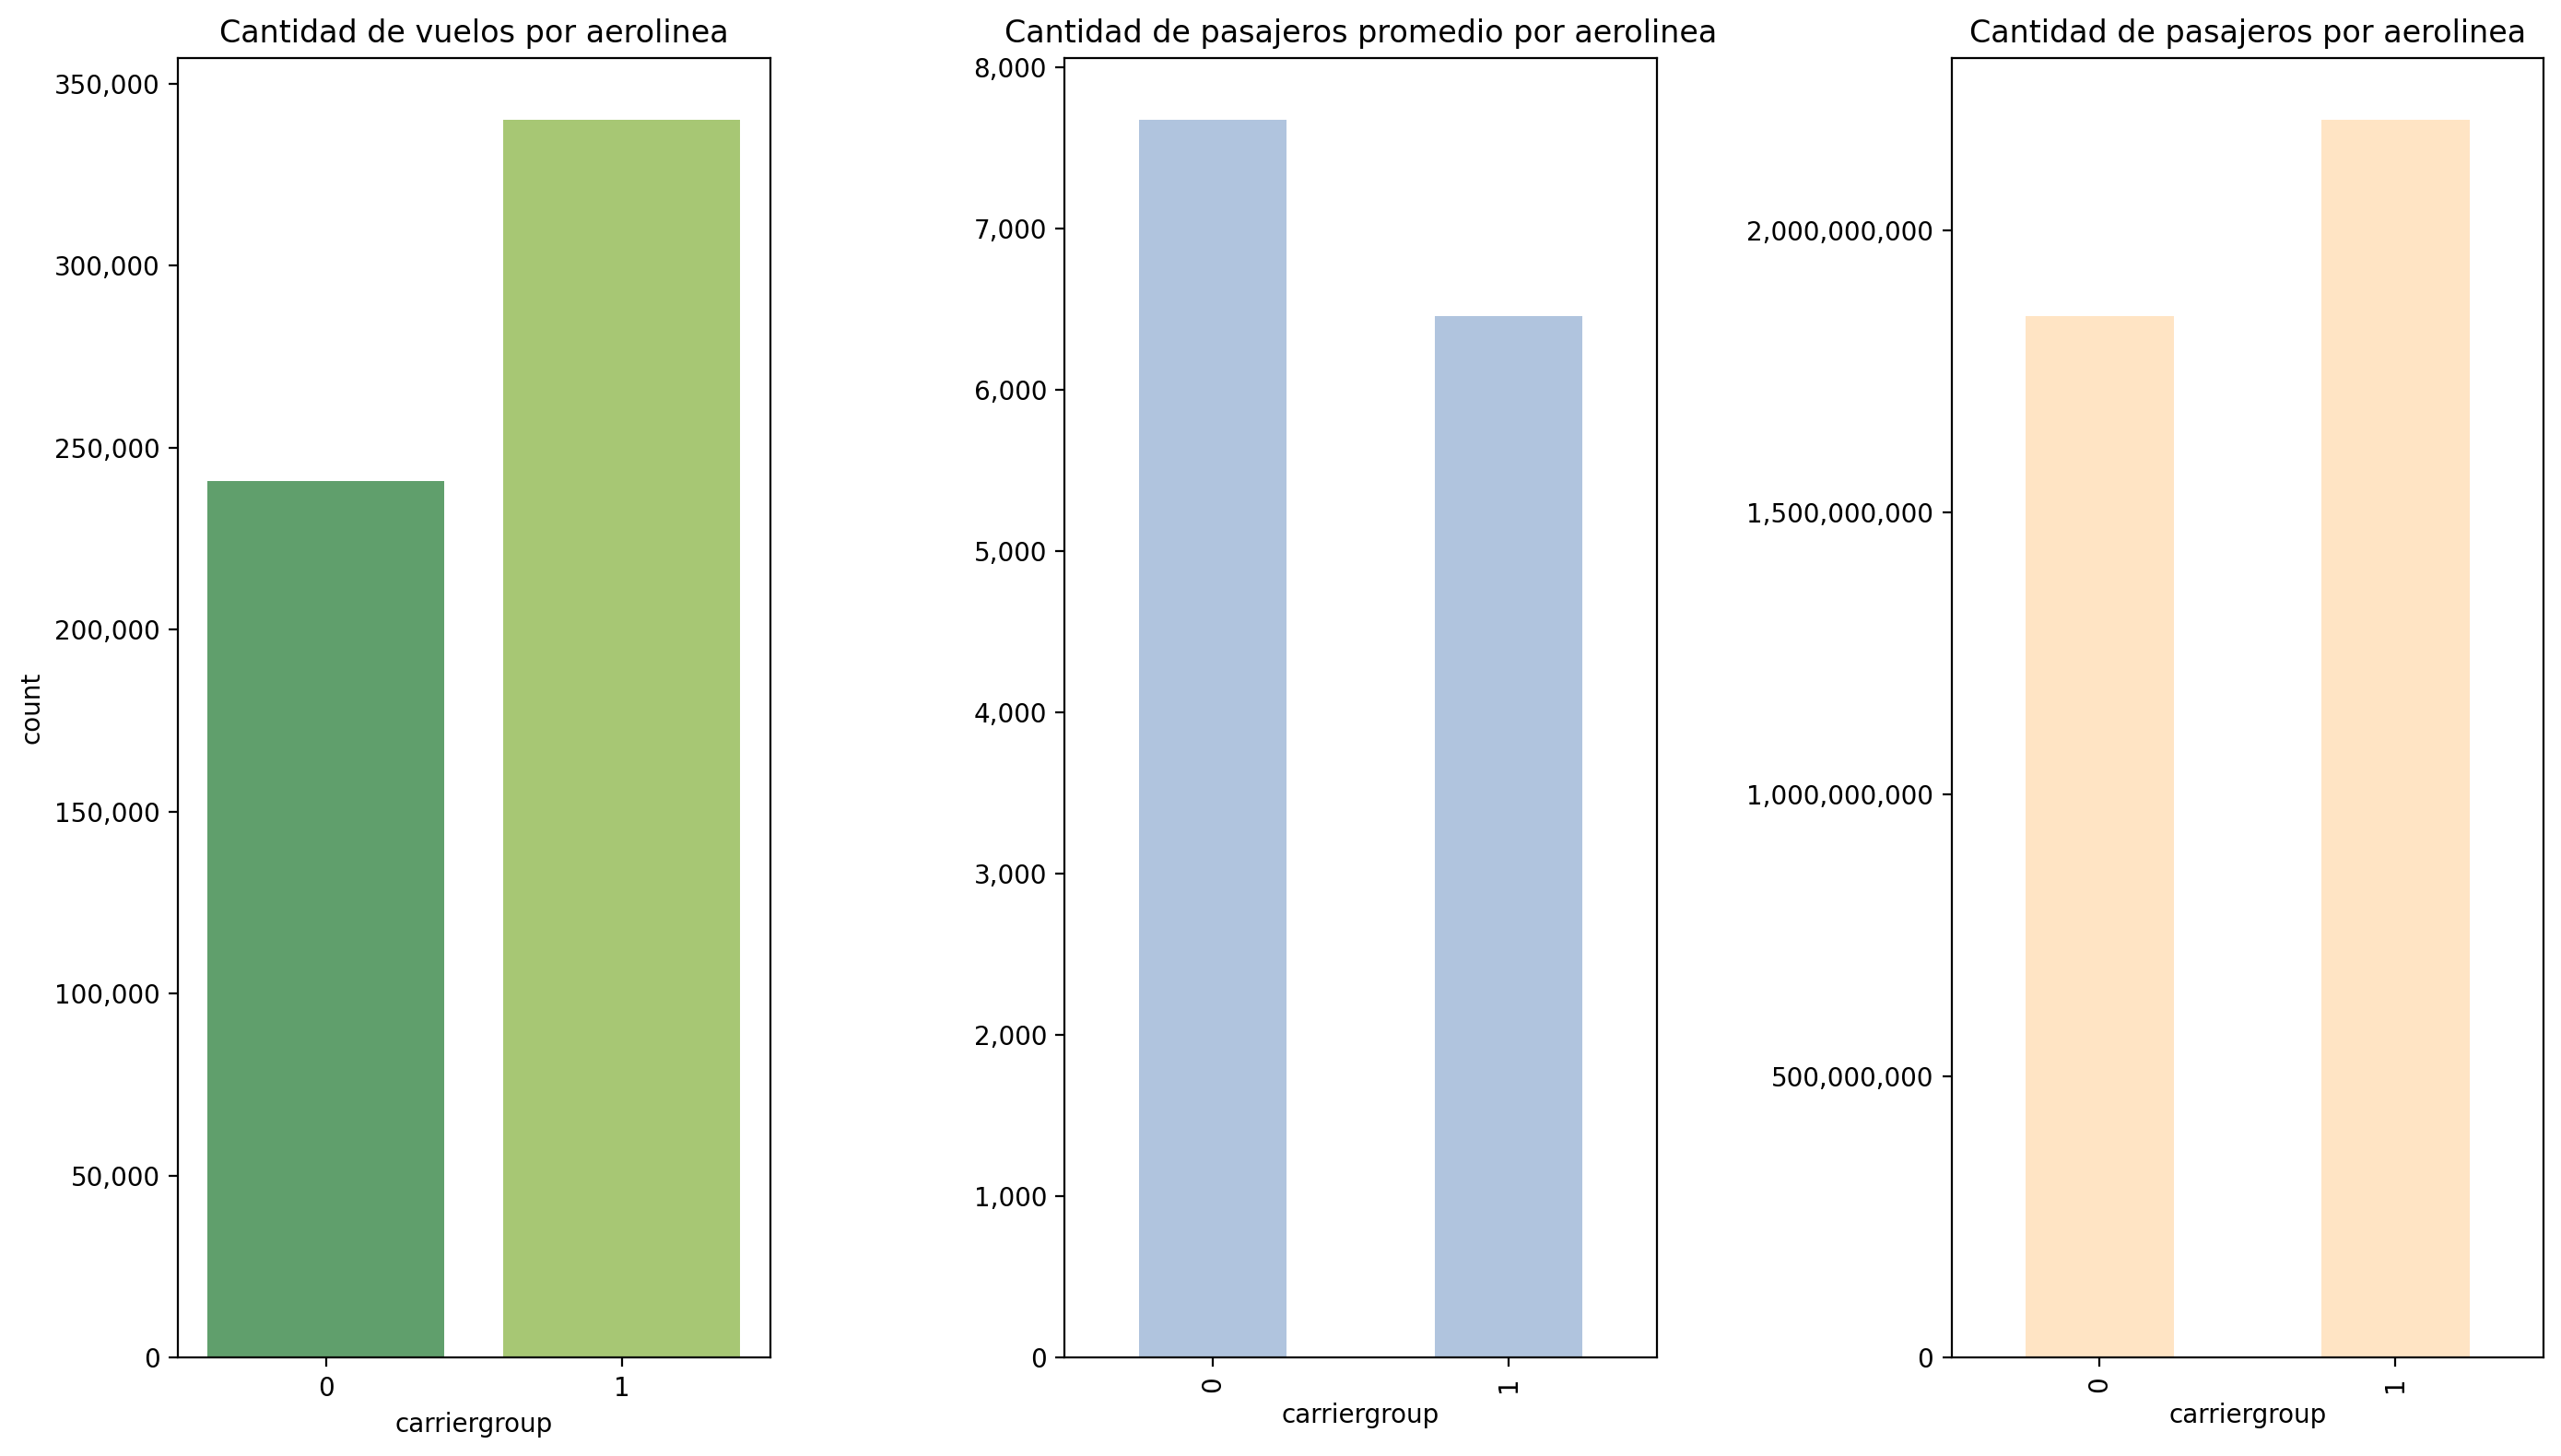

In [15]:
import matplotlib.ticker as ticker

fig,ax = plt.subplots(1,3,figsize=(14,8),dpi=200)

ax[0]=sns.countplot(data=data,x='carriergroup',palette='summer',ax=ax[0])
ax[1]=data.groupby('carriergroup')['Scheduled'].mean().plot(kind='bar',color='lightsteelblue',ax=ax[1])
ax[2]=data.groupby('carriergroup')['Scheduled'].sum().plot(kind='bar',color='bisque',ax=ax[2])

ax[0].set_title('Cantidad de vuelos por aerolinea')
ax[1].set_title('Cantidad de pasajeros promedio por aerolinea')
ax[2].set_title('Cantidad de pasajeros por aerolinea')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax[0].yaxis.set_major_formatter(formatter)
ax[1].yaxis.set_major_formatter(formatter)
ax[2].yaxis.set_major_formatter(formatter)
plt.tight_layout();

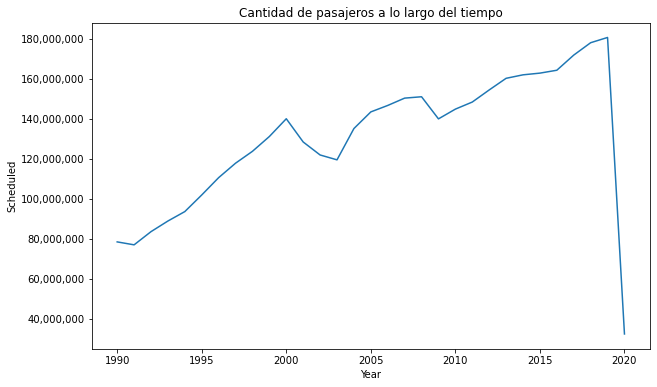

In [16]:
fig,ax = plt.subplots(figsize=(10,6))

x = data.groupby('Year').agg({'Scheduled':'sum'})
sns.lineplot(data=x,x=x.index,y='Scheduled')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

plt.title('Cantidad de pasajeros a lo largo del tiempo');

### Faltan datos para el año 2020?

In [17]:
data['Year'].value_counts().sort_index()

1990    15546
1991    15772
1992    16776
1993    17753
1994    18405
1995    19820
1996    20571
1997    20860
1998    21668
1999    21430
2000    20458
2001    20986
2002    18648
2003    19782
2004    20486
2005    20535
2006    20715
2007    20227
2008    19936
2009    18306
2010    18815
2011    19023
2012    18980
2013    19144
2014    19292
2015    18694
2016    18389
2017    18439
2018    18568
2019    18376
2020     4527
Name: Year, dtype: int64

### Es mucha la diferencia, trabajaremos con datos menores al año 2020

In [18]:
data = data[data['Year'] < 2020]

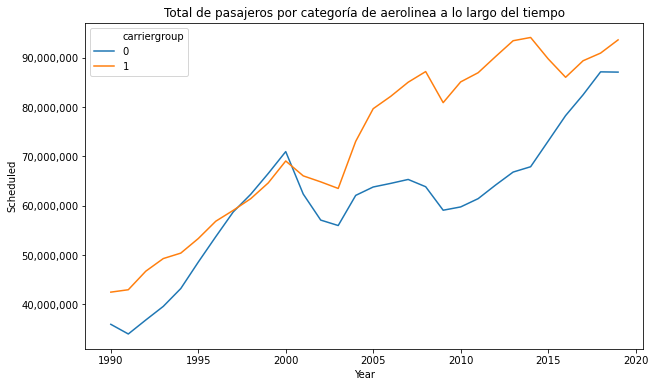

In [19]:
fig,ax = plt.subplots(figsize=(10,6))

sns.lineplot(data=data,x='Year',y='Scheduled',estimator='sum',err_style=None,hue='carriergroup')
formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

plt.title('Total de pasajeros por categoría de aerolinea a lo largo del tiempo');

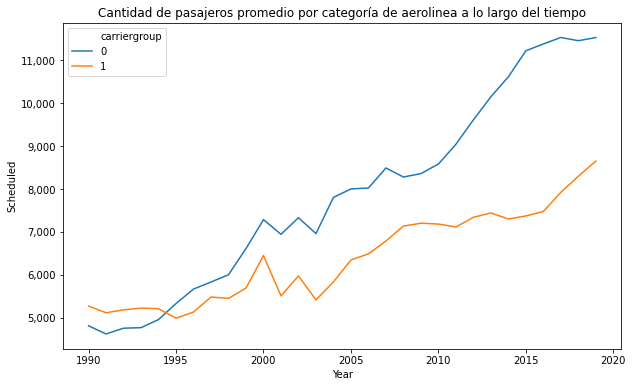

In [20]:
fig,ax= plt.subplots(figsize=(10,6))

sns.lineplot(data=data,x='Year',y='Scheduled',estimator='mean',err_style=None,hue='carriergroup')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

plt.title('Cantidad de pasajeros promedio por categoría de aerolinea a lo largo del tiempo');

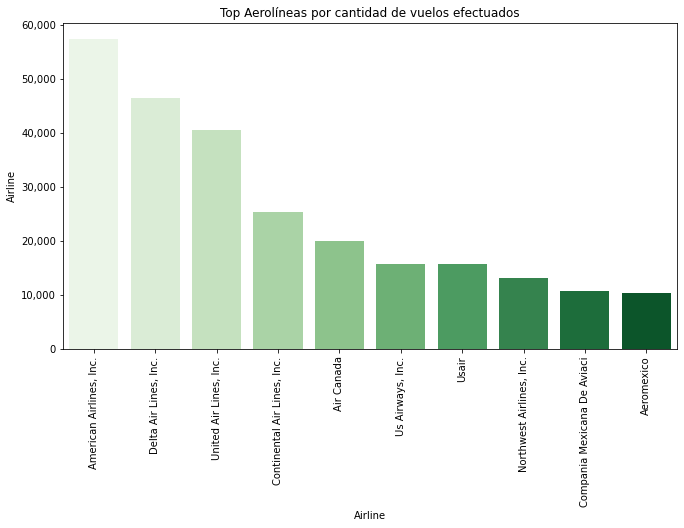

In [21]:
airlines= data.groupby('Airline').agg({'Airline':lambda x: x.count()}).nlargest(10,'Airline')
fig,ax=plt.subplots(figsize=(11,6))

sns.barplot(data=airlines,x=airlines.index,y='Airline',palette='Greens')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

plt.title('Top Aerolíneas por cantidad de vuelos efectuados')
plt.xticks(rotation=90);

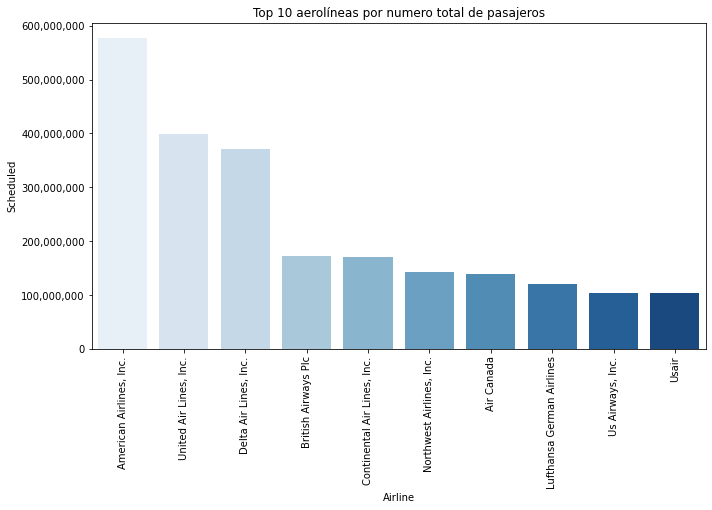

In [22]:
airlines= data.groupby('Airline').agg({'Scheduled':'sum'}).nlargest(10,'Scheduled')

fig,ax=plt.subplots(figsize=(11,6))
sns.barplot(data=airlines,x=airlines.index,y='Scheduled',palette='Blues')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)
plt.title('Top 10 aerolíneas por numero total de pasajeros')
plt.xticks(rotation=90);

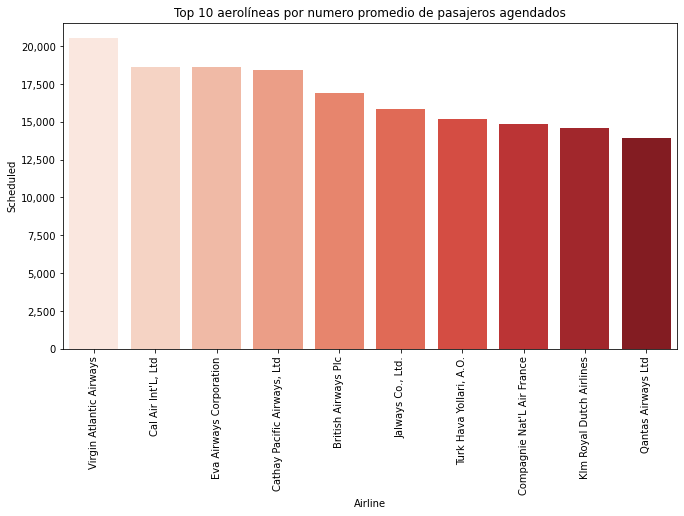

In [23]:
airlines= data.groupby('Airline').agg({'Scheduled':'mean'}).nlargest(10,'Scheduled')

fig,ax=plt.subplots(figsize=(11,6))

sns.barplot(data=airlines,x=airlines.index,y='Scheduled',palette='Reds')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)
plt.title('Top 10 aerolíneas por numero promedio de pasajeros agendados')
plt.xticks(rotation=90);

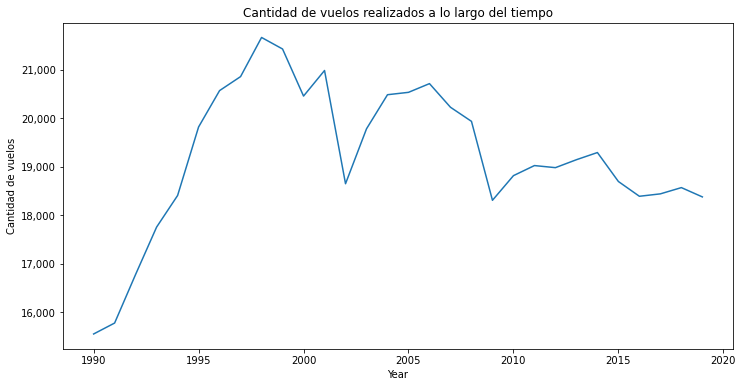

In [24]:
year_popular = data.groupby(data['Year']).agg({'Year':lambda x:x.count()})

fig,ax = plt.subplots(figsize=(12,6))
formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

plt.xticks(np.linspace(1990,2020,7))
sns.lineplot(data=year_popular,x=year_popular.index,y='Year')

ax.set_ylabel('Cantidad de vuelos')
plt.title('Cantidad de vuelos realizados a lo largo del tiempo');

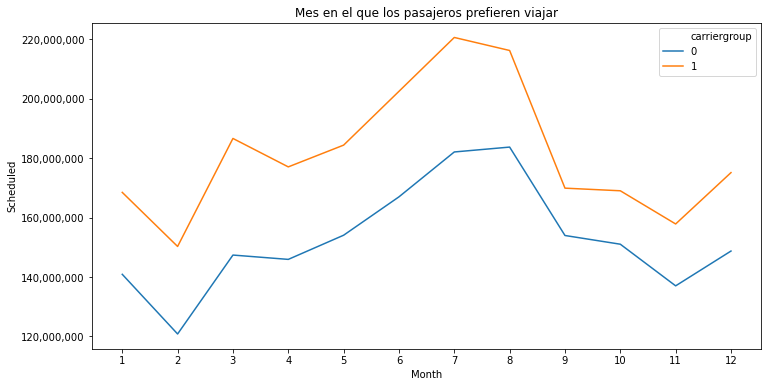

In [25]:
fig,ax = plt.subplots(figsize=(12,6))

sns.lineplot(data=data,x='Month',y='Scheduled',estimator='sum',err_style=None,hue='carriergroup')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

plt.xticks(np.linspace(1,12,12))
plt.title('Mes en el que los pasajeros prefieren viajar');

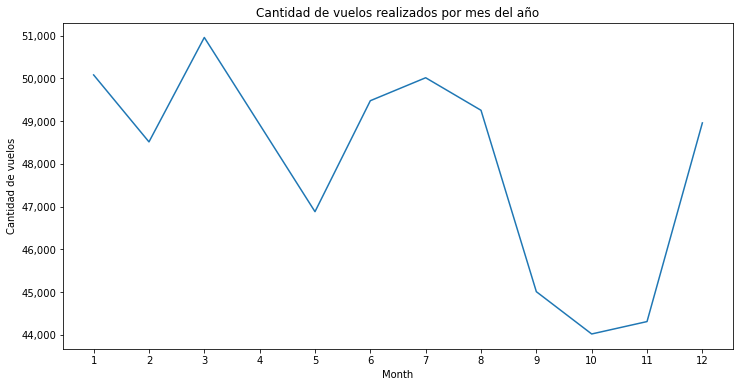

In [26]:
months_popular = data.groupby(data['Month']).agg({'Month':lambda x:x.count()})

fig,ax = plt.subplots(figsize=(12,6))
formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

plt.xticks(np.linspace(1,12,12))
sns.lineplot(data=months_popular,x=months_popular.index,y='Month')

ax.set_ylabel('Cantidad de vuelos')
plt.title('Cantidad de vuelos realizados por mes del año');

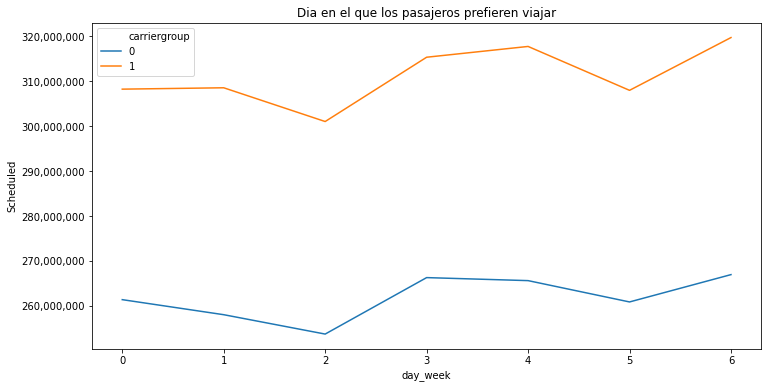

In [27]:
fig,ax = plt.subplots(figsize=(12,6))

sns.lineplot(data=data,x='day_week',y='Scheduled',estimator='sum',err_style=None,hue='carriergroup')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

plt.xticks([0,1,2,3,4,5,6])
plt.title('Dia en el que los pasajeros prefieren viajar');

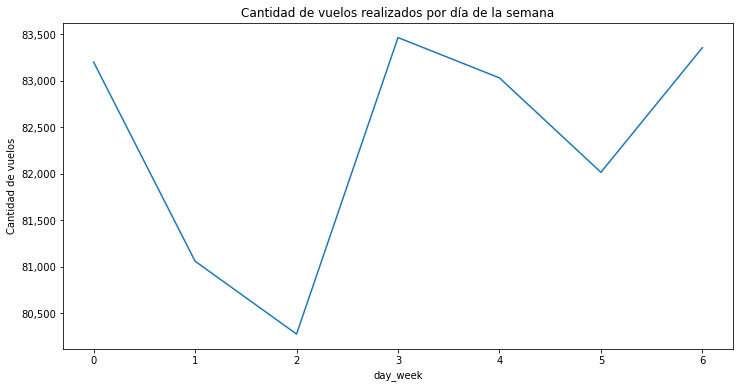

In [28]:
months_popular = data.groupby(data['day_week']).agg({'day_week':lambda x:x.count()})

fig,ax = plt.subplots(figsize=(12,6))
formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

plt.xticks([0,1,2,3,4,5,6])
sns.lineplot(data=months_popular,x=months_popular.index,y='day_week')

ax.set_ylabel('Cantidad de vuelos')
plt.title('Cantidad de vuelos realizados por día de la semana');

###  Países más visitados

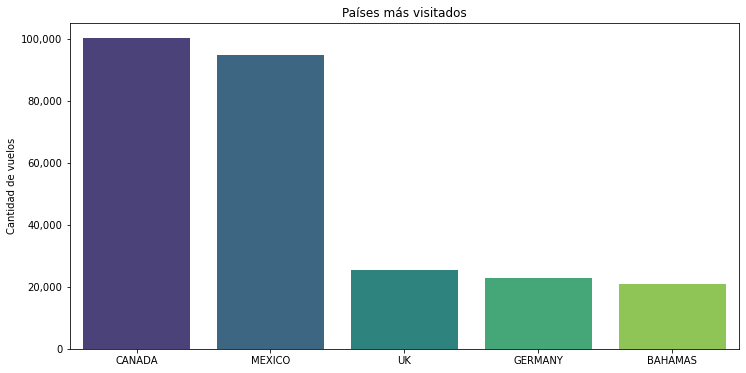

In [29]:
paises = data['Country Destination'].value_counts()[:5]
paises = pd.DataFrame(paises)

fig,ax = plt.subplots(figsize=(12,6))
sns.barplot(data=paises,x=paises.index,y='Country Destination',palette='viridis')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Cantidad de vuelos')

plt.title('Países más visitados');

### Mes (historico) más popular para viajar a los top países

### Ciudades más visitadas

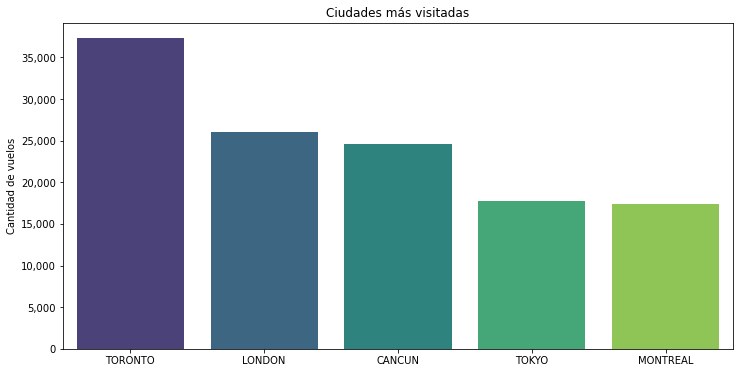

In [30]:
ciudades = data['City Destination'].value_counts().nlargest(5)
ciudades = pd.DataFrame(ciudades)

fig,ax = plt.subplots(figsize=(12,6))

sns.barplot(data=ciudades,x=ciudades.index,y='City Destination',palette='viridis')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

ax.set_ylabel('Cantidad de vuelos')
plt.title('Ciudades más visitadas');

In [31]:
for x in paises.index:
    r = data[data['Country Destination'] == x ]['month_name'].value_counts().index[0]
    print('The historical most popular month to visit {0} is {1}'.format(x,r))

The historical most popular month to visit CANADA is March
The historical most popular month to visit MEXICO is March
The historical most popular month to visit UK is July
The historical most popular month to visit GERMANY is July
The historical most popular month to visit BAHAMAS is March


### Mes (historico) más popular para viajar a las top ciudades

In [32]:
for x in ciudades.index:
    r = data[data['City Destination'] == x ]['month_name'].value_counts().index[0]
    print('The historical most popular month to visit {0} is {1}'.format(x,r))

The historical most popular month to visit TORONTO is March
The historical most popular month to visit LONDON is July
The historical most popular month to visit CANCUN is March
The historical most popular month to visit TOKYO is August
The historical most popular month to visit MONTREAL is January


### Top destinos (Ciudades) por origen de vuelo (Estados)

In [33]:
data['Flights'] = data['State Departure'] + str(' to ') + data['City Destination']
data.groupby('Flights')['Flights'].count().nlargest(5)

Flights
FLORIDA to TORONTO     4912
CALIFORNIA to TOKYO    4908
NEW YORK to TORONTO    4133
FLORIDA to LONDON      3980
FLORIDA to NASSAU      3764
Name: Flights, dtype: int64

### Top destinos (Países) por origen de vuelo (Estados)

In [34]:
data['Flights'] = data['State Departure'] + str(' to ') + data['Country Destination']
data.groupby('Flights')['Flights'].count().nlargest(5)

Flights
TEXAS to MEXICO         21952
CALIFORNIA to MEXICO    20290
FLORIDA to CANADA       10568
NEW YORK to CANADA       9865
CALIFORNIA to CANADA     8442
Name: Flights, dtype: int64

### Estados con mayor cantidad de Aerolineas y número de aeropuertos

In [35]:
airlines_per_states = data.groupby('State Departure').agg({'Airline':lambda x: x.nunique(),'Airport':lambda x: x.nunique()}).sort_values('Airline',ascending=False)
airlines_per_states[:10]

,Airline,Airport
State Departure,,
NEW YORK,199,17
FLORIDA,194,37
CALIFORNIA,166,32
NEW JERSEY,142,7
MASSACHUSETTS,134,8
ILLINOIS,129,12
D.C.,118,2
TEXAS,116,39
MARYLAND,112,3


### Top Aerolinas (historico) por cantidad de pasajeros (total)

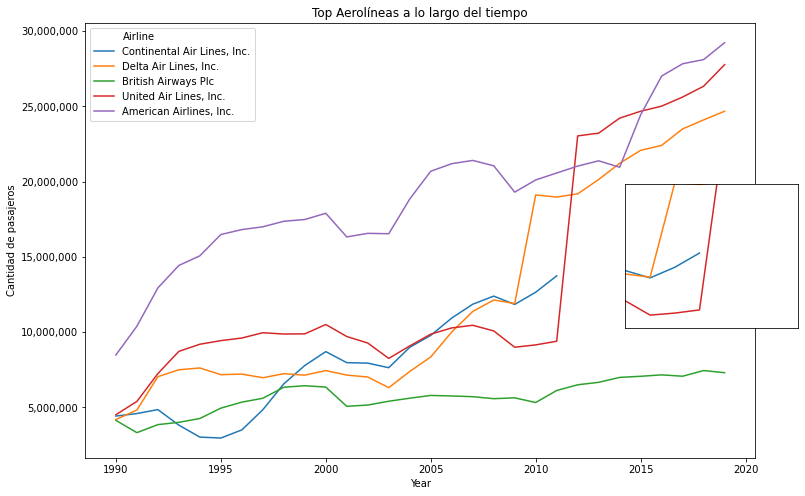

In [44]:
airlines = data.groupby('Airline').agg({'Scheduled':'sum'}).nlargest(5,'Scheduled')
top_airlines5 = data[data['Airline'].isin(airlines.index)]

fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=top_airlines5,y='Scheduled',estimator='sum',x='Year',err_style=None,hue='Airline')
formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)
ax.set_ylabel('Cantidad de pasajeros')
plt.title('Top Aerolíneas a lo largo del tiempo')
ax.legend(loc=(2))


zoom_ax = fig.add_axes([0.75,0.35,0.20,0.25])
sns.lineplot(data=top_airlines5,y='Scheduled',estimator='sum',x='Year',err_style=None,hue='Airline',ax=zoom_ax)
zoom_ax.set_xlim(2008,2015)
zoom_ax.set_ylim(8000000,19000000)
zoom_ax.tick_params(which='both',bottom=False,top=False,labelbottom=False)
zoom_ax.axes.get_xaxis().set_visible(False)
zoom_ax.axes.get_yaxis().set_visible(False)
zoom_ax.get_legend().remove()

## ¿Porqué faltan datos y hay un sopresivo crecimiento para "United"?

Continental Air Lines, Inc. y United Air Lines, Inc. Se fusionaron en el primer semestre del 2010, eso explica la repentina alza en la alza de pasajeros junto con el desaparecimiento de información.


Original Source:       https://www.elmundo.es/america/2010/05/03/economia/1272841917.html#:~:text=millones%20de%20d%C3%B3lares-,United%20Airlines%20y%20Continental%20se%20fusionan%20y%20crean,a%C3%A9rea%20m%C3%A1s%20grande%20del%20mundo&text=Los%20consejos%20de%20Administraci%C3%B3n%20de,mayor%20compa%C3%B1%C3%ADa%20a%C3%A9rea%20del%20mundo  

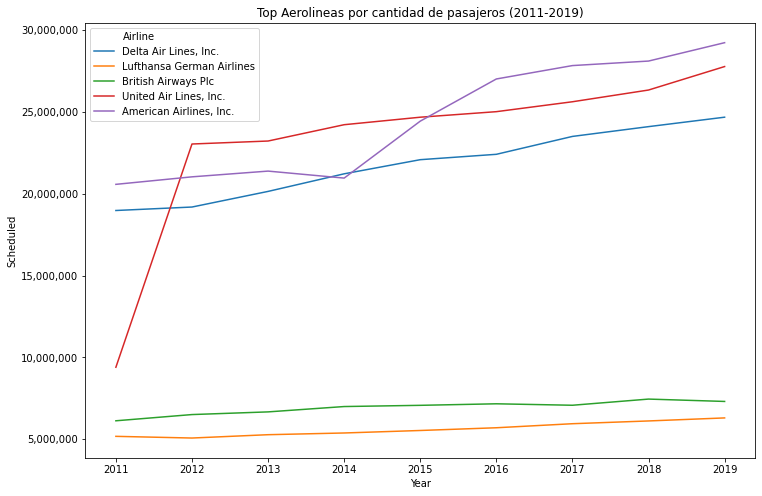

In [38]:
data_filtered = data[data['Year'] >= 2011]
airlines = data_filtered.groupby('Airline').agg({'Scheduled':'sum'}).nlargest(5,'Scheduled')
top_airlines = data_filtered[data_filtered['Airline'].isin(airlines.index)]

fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=top_airlines,y='Scheduled',estimator='sum',x='Year',err_style=None,hue='Airline')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)

ax.set_title('Top Aerolineas por cantidad de pasajeros (2011-2019)')
plt.legend(loc=(2));

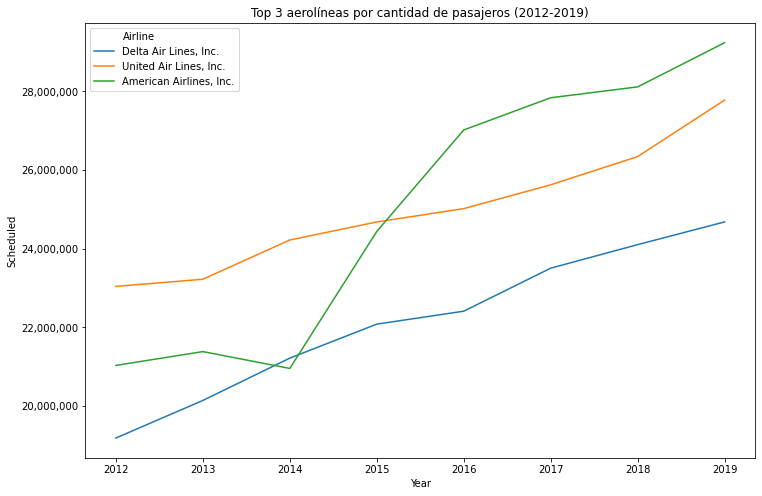

In [39]:
data_filtered2 = data[data['Year'] >= 2012]
airlines = data_filtered2.groupby('Airline').agg({'Scheduled':'sum'}).nlargest(3,'Scheduled')
top_airlines_sum = data_filtered2[data_filtered2['Airline'].isin(airlines.index)]

fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=top_airlines_sum,y='Scheduled',estimator='sum',x='Year',err_style=None,hue='Airline')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)
ax.set_title('Top 3 aerolíneas por cantidad de pasajeros (2012-2019)')

plt.legend(loc=(2));

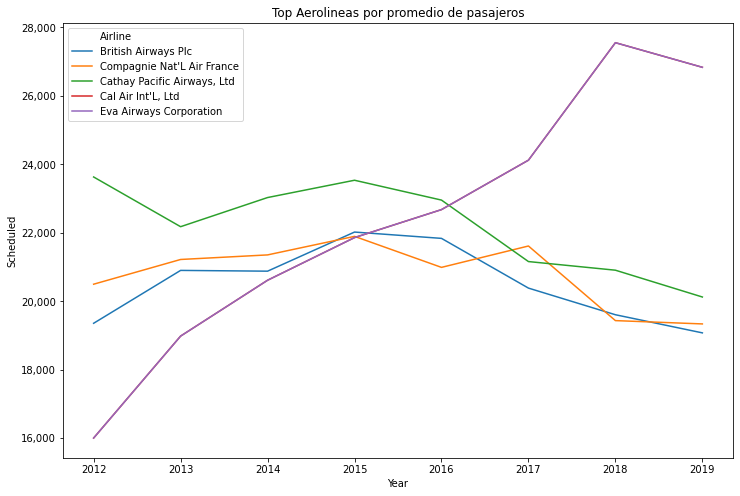

In [40]:
airlines = data_filtered2.groupby('Airline').agg({'Scheduled':'mean'}).nlargest(5,'Scheduled')
top_airlines_mean = data_filtered2[data_filtered2['Airline'].isin(airlines.index)]

fig,ax = plt.subplots(figsize=(12,8))
sns.lineplot(data=top_airlines_mean,y='Scheduled',estimator='mean',x='Year',err_style=None,hue='Airline')

formatter = ticker.FuncFormatter(lambda x,p: format(int(x),','))
ax.yaxis.set_major_formatter(formatter)
ax.set_title('Top Aerolineas por promedio de pasajeros')
plt.legend(loc=(2));

### Top Aerolineas por cantidad de presencia en Aeropuertos

In [41]:
data.groupby('Airline').agg({'Airport':lambda x: x.nunique()}).sort_values('Airport',ascending=False)[:5]

,Airport
Airline,
Miami Air International,231
"Airbc, Ltd.",188
Air Canada,178
"Delta Air Lines, Inc.",171
"American Airlines, Inc.",161
